# PRACTICA N°8

##### **TEMA:** _ NAIVE BAYES Y ÁRBOLES DE DECISIÓN_

##### **INTEGRANTES:** 
#####                 _José Cueva_
#####                 _Estefanía Quimbiulco_

##### **OBJETIVOS:** 
+ Analizar un dataset mediante algoritmos de aprendizaje supervisado para crear un modelo de clasificación.
+ Familiarizarse con el uso de phyton para realizar el análisis de un dataset aplicando las librerías de modelado de datos.
+ Aplicar métodos de Python para el modelado de datos, basados en Naive-Bayes y Árboles de decisión.

In [37]:
import pandas as pd

In [38]:
df=pd.read_csv("Ingresos.csv")

## **Análisis general:** 

Determinar el **tamaño** del dataset (Número de Registros y número de variables).

In [39]:
#Numero de registros
df.shape
#Numero de Registros = 16281 y Numero de variables=9

(16281, 9)

Determinar el **tipo de dato** de cada una de las variables del dataset.

In [40]:
df.dtypes

Unnamed: 0              int64
Unnamed: 0.1            int64
Edad                    int64
Nivel-Educacion         int64
Estado-civil            int64
Genero                  int64
Capital                 int64
Horas-trabajo-Semana    int64
Ingresos                int64
dtype: object

Verificar si existen **datos faltantes** en el dataset.

In [41]:
import numpy as np

In [42]:
datos_faltantes=df.isnull()
for column in datos_faltantes.columns.values.tolist():
    print(column)
    print(datos_faltantes[column].value_counts())
    print("")

Unnamed: 0
False    16281
Name: Unnamed: 0, dtype: int64

Unnamed: 0.1
False    16281
Name: Unnamed: 0.1, dtype: int64

Edad
False    16281
Name: Edad, dtype: int64

Nivel-Educacion
False    16281
Name: Nivel-Educacion, dtype: int64

Estado-civil
False    16281
Name: Estado-civil, dtype: int64

Genero
False    16281
Name: Genero, dtype: int64

Capital
False    16281
Name: Capital, dtype: int64

Horas-trabajo-Semana
False    16281
Name: Horas-trabajo-Semana, dtype: int64

Ingresos
False    16281
Name: Ingresos, dtype: int64



Determinar la **correlación** entre las variables del dataset.

In [43]:
df.corr()

,Unnamed: 0,Unnamed: 0.1,Edad,Nivel-Educacion,Estado-civil,Genero,Capital,Horas-trabajo-Semana,Ingresos
Unnamed: 0,1.000000,1.000000,0.006016,0.004774,-0.008461,-0.001907,-0.009273,-0.001574,0.002287
Unnamed: 0.1,1.000000,1.000000,0.006016,0.004774,-0.008461,-0.001907,-0.009273,-0.001574,0.002287
Edad,0.006016,0.006016,1.000000,0.019945,-0.318507,0.086773,0.076377,0.077058,0.223253
Nivel-Educacion,0.004774,0.004774,0.019945,1.000000,-0.064190,0.003413,0.130092,0.134899,0.327482
Estado-civil,-0.008461,-0.008461,-0.318507,-0.064190,1.000000,-0.419593,-0.072586,-0.214321,-0.439973
Genero,-0.001907,-0.001907,0.086773,0.003413,-0.419593,1.000000,0.044412,0.227077,0.211892
Capital,-0.009273,-0.009273,0.076377,0.130092,-0.072586,0.044412,1.000000,0.089390,0.222487
Horas-trabajo-Semana,-0.001574,-0.001574,0.077058,0.134899,-0.214321,0.227077,0.089390,1.000000,0.223704
Ingresos,0.002287,0.002287,0.223253,0.327482,-0.439973,0.211892,0.222487,0.223704,1.000000


Modificar el **tipo de dato** de las variables de entrada que considere necesario.


In [44]:
# No es necesario modificar el tipo de dato, ya que todos son numéricos

Graficar la distribución de los datos de las variables de entrada, utilizando la gráfica de **histograma**

In [45]:
import matplotlib.pyplot as plt

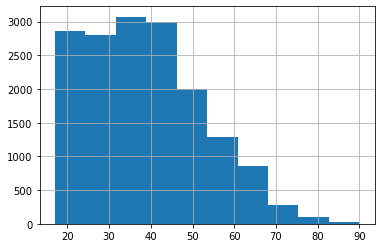

In [52]:
df["Edad"].hist()
plt.show()

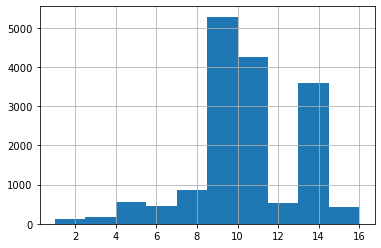

In [53]:
df["Nivel-Educacion"].hist()
plt.show()

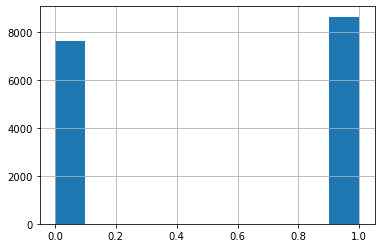

In [54]:
df["Estado-civil"].hist()
plt.show()

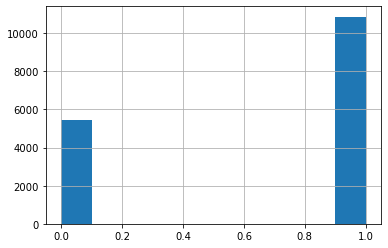

In [55]:
df["Genero"].hist()
plt.show()

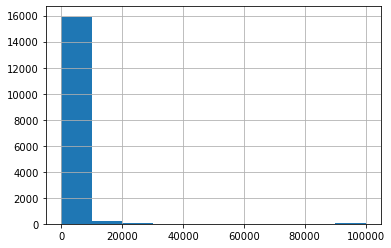

In [56]:
df["Capital"].hist()
plt.show()

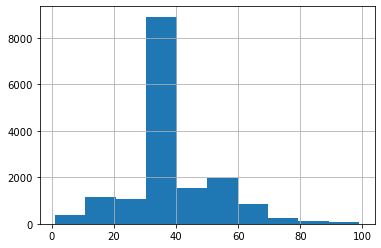

In [57]:
df["Horas-trabajo-Semana"].hist()
plt.show()

## **Modelo de Clasificación con Naive-Bayes** 

Obtenga el modelo de clasificación para el dataset con los métodos apropiados. Utilice todas las variables de entrada.

In [60]:
x=np.asarray(df[["Edad","Nivel-Educacion","Estado-civil","Genero","Capital","Horas-trabajo-Semana"]])
y=np.asarray(df["Ingresos"])

In [62]:
#Dividir el datset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1)

In [63]:
#Clasificador Naive-Bayes
from sklearn.naive_bayes import GaussianNB

In [64]:
#Crear un objeto de GaGaussianNB
GNB=GaussianNB()
GNB

GaussianNB(priors=None, var_smoothing=1e-09)

In [66]:
#Ajustar los datos de entrenamiento - algoritmo aprende de los datos
GNB.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [68]:
#Obtenemos la hipotesis o las predicciones
predicciones=GNB.predict(xtest)

Evalúe el modelo obtenido con las **métricas** que considere pertinentes.

In [70]:
from sklearn.metrics import accuracy_score,precision_score

In [71]:
#Evaluar el clasificador mediante las métricas
acc=accuracy_score(ytest,predicciones)
print("la exactitud del clasificador es: \n ", acc)
pre=precision_score(ytest,predicciones)
print("la precision del clasificador es: \n ", pre)

la exactitud del clasificador es: 
  0.7988209285187915
la precision del clasificador es: 
  0.7908745247148289


Aplique **PCA** para disminuir el número de variables de entrada.

In [72]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [73]:
#Crear la nueva variable de entrada normalizada
x_se=StandardScaler().fit_transform(x)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [74]:
#Instanciamos el objeto PCA y definimos 6 componentes principales
pca=PCA(n_components=6)

In [75]:
#Obtener componentes principales
pca.fit(x_se)
#X_pca tien las componenete principales
X_pca=pca.transform(x_se)

In [76]:
#Mostrar las componentes principales
X_pca

array([[-0.81962244, -0.73375977, -0.9810478 ,  1.12473372,  0.11924901,
         0.60887458],
       [ 1.19211079, -0.61927051, -0.57625371,  0.22853928,  0.19068597,
        -0.4465039 ],
       [ 0.78821762,  0.13844944, -0.83090198, -0.16434185, -1.0545389 ,
        -0.59425174],
       ...,
       [ 1.46007728,  0.4651791 , -0.71315572, -0.65706564, -0.40716979,
        -0.30895196],
       [ 0.24586841,  1.08386715,  0.05408957, -0.12569874, -0.41848526,
         1.31432441],
       [ 1.71131431,  0.67165041, -1.23772578, -0.63088839,  0.13805978,
        -0.40996249]])

Obtenga nuevamente el modelo de Clasificación y evalúe con las métricas que considere pertinentes.

In [77]:
#Dividir el dataset
xtrain1,xtest1,ytrain1,ytest1=train_test_split(X_pca,y,random_state=1)

In [78]:
#Crear un objeto de GaGaussianNB
GNB1=GaussianNB()
GNB1

GaussianNB(priors=None, var_smoothing=1e-09)

In [79]:
#Ajustar los datos de entrenamiento - algoritmo aprende de los datos
GNB1.fit(xtrain1,ytrain1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [80]:
#Obtenemos la hipotesis o las predicciones
predicciones1=GNB1.predict(xtest1)

In [81]:
#Evaluar el clasificador mediante las métricas
acc1=accuracy_score(ytest1,predicciones1)
print("la exactitud del clasificador es: \n ", acc1)
pre1=precision_score(ytest1,predicciones1)
print("la precision del clasificador es: \n ", pre1)

la exactitud del clasificador es: 
  0.7912060918693196
la precision del clasificador es: 
  0.6355555555555555


Realice una tabla comparativa con las métricas antes y después de aplicar **PCA**.


* | sin PCA | con PCA
--|--|--
Exactitud| 0.7988209285187915 | 0.7912060918693196
Precision| 0.7908745247148289 | 0.6355555555555555 